In [44]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
train=pd.read_csv('train.csv')

In [46]:
train

,id,date,product_id,price,discount,season_type,sales_amount,on_promotion,promotion_type,store_count
0,1,2018-08-06,21,221.47,0.0,Autumn-Winter,83.0,1,Main Promo 3,85
1,2,2018-08-13,21,221.47,0.0,Autumn-Winter,100.0,1,Main Promo 3,85
2,3,2018-08-20,21,221.47,0.0,Autumn-Winter,127.0,1,Main Promo 3,85
3,4,2018-08-27,21,221.47,0.0,Autumn-Winter,89.0,1,Main Promo 3,84
4,5,2018-09-03,21,221.47,0.0,Autumn-Winter,124.0,1,Main Promo 3,85
...,...,...,...,...,...,...,...,...,...,...
405287,405288,2020-10-26,7888,61.57,0.0,Summer-Spring,0.0,1,Season Middle Promo 1,17
405288,405289,2020-11-02,7888,61.57,0.0,Summer-Spring,0.0,1,Season Middle Promo 1,15
405289,405290,2020-11-09,7888,61.57,0.0,Summer-Spring,0.0,1,Season Middle Promo 1,13
405290,405291,2020-11-16,7888,61.57,0.0,Summer-Spring,0.0,1,Season Middle Promo 1,10


# Seasons

In [47]:
#Coding seasons with 1 and -1

seasonlist=[]
for i in train["season_type"]:
    if i == "Autumn-Winter":
        seasonlist.append(-1)
    else:
        seasonlist.append(1)
seasondata=pd.DataFrame(seasonlist,columns=["season"])
seasondata

,season
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
405287,1
405288,1
405289,1
405290,1


# Promotion 

In [48]:
check=[]
count=0
for j in train["promotion_type"]:
    if j not in check:
        check.append(j)
        count+=1
print(count)
check

8


['Main Promo 3',
 nan,
 'Season Middle Promo 1',
 'Season Middle Promo 2',
 'BlackFriday',
 'Genaral Promo- No label discount',
 'Main Promo 1',
 'Main Promo 2']

In [49]:
#Coding promotion types as 0,  1, 2, 3 for Main promos.

mainpromolist=[]
for k in train["promotion_type"]:
    if k == "Main Promo 3":
        mainpromolist.append(3)
    elif k == "Main Promo 2":
        mainpromolist.append(2)
    elif k == "Main Promo 1":
        mainpromolist.append(1)
    else:
        mainpromolist.append(0)

mainpromodata=pd.DataFrame(mainpromolist,columns=["main_promo"])
mainpromodata


,main_promo
0,3
1,3
2,3
3,3
4,3
...,...
405287,0
405288,0
405289,0
405290,0


In [50]:
#Coding Seosonal Promos as 0, 1, 2.

seasonalpromolist=[]
for k in train["promotion_type"]:
    if k == "Season Middle Promo 1":
        seasonalpromolist.append(1)
    elif k == "Season Middle Promo 2":
        seasonalpromolist.append(2)
    else:
        seasonalpromolist.append(0)

seasonalpromodata=pd.DataFrame(seasonalpromolist,columns=["seasonal_promo"])
seasonalpromodata


,seasonal_promo
0,0
1,0
2,0
3,0
4,0
...,...
405287,1
405288,1
405289,1
405290,1


In [51]:
generalpromo=[]
for k in train["promotion_type"]:
    if k == "Genaral Promo- No label discount":
        generalpromo.append(1)
    else:
        generalpromo.append(0)

generalpromodata=pd.DataFrame(generalpromo,columns=["general_promo"])
generalpromodata


,general_promo
0,0
1,0
2,0
3,0
4,0
...,...
405287,0
405288,0
405289,0
405290,0


In [52]:
blackfriday=[]
for k in train["promotion_type"]:
    if k == "BlackFriday":
        blackfriday.append(1)
    else:
        blackfriday.append(0)

blackfridaydata=pd.DataFrame(blackfriday,columns=["black_friday"])
blackfridaydata



,black_friday
0,0
1,0
2,0
3,0
4,0
...,...
405287,0
405288,0
405289,0
405290,0


The seasons are coded inside their own types.

In [53]:
train["season"]=seasondata
train["main_promo"]=mainpromodata
train["seasonal_promo"]=seasonalpromodata
train["general_promo"]=generalpromodata
train["black_friday"]=blackfridaydata
train

,id,date,product_id,price,discount,season_type,sales_amount,on_promotion,promotion_type,store_count,season,main_promo,seasonal_promo,general_promo,black_friday
0,1,2018-08-06,21,221.47,0.0,Autumn-Winter,83.0,1,Main Promo 3,85,-1,3,0,0,0
1,2,2018-08-13,21,221.47,0.0,Autumn-Winter,100.0,1,Main Promo 3,85,-1,3,0,0,0
2,3,2018-08-20,21,221.47,0.0,Autumn-Winter,127.0,1,Main Promo 3,85,-1,3,0,0,0
3,4,2018-08-27,21,221.47,0.0,Autumn-Winter,89.0,1,Main Promo 3,84,-1,3,0,0,0
4,5,2018-09-03,21,221.47,0.0,Autumn-Winter,124.0,1,Main Promo 3,85,-1,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405287,405288,2020-10-26,7888,61.57,0.0,Summer-Spring,0.0,1,Season Middle Promo 1,17,1,0,1,0,0
405288,405289,2020-11-02,7888,61.57,0.0,Summer-Spring,0.0,1,Season Middle Promo 1,15,1,0,1,0,0
405289,405290,2020-11-09,7888,61.57,0.0,Summer-Spring,0.0,1,Season Middle Promo 1,13,1,0,1,0,0
405290,405291,2020-11-16,7888,61.57,0.0,Summer-Spring,0.0,1,Season Middle Promo 1,10,1,0,1,0,0


In [54]:
traindata=train.drop(columns=["season_type","promotion_type"])
traindata

,id,date,product_id,price,discount,sales_amount,on_promotion,store_count,season,main_promo,seasonal_promo,general_promo,black_friday
0,1,2018-08-06,21,221.47,0.0,83.0,1,85,-1,3,0,0,0
1,2,2018-08-13,21,221.47,0.0,100.0,1,85,-1,3,0,0,0
2,3,2018-08-20,21,221.47,0.0,127.0,1,85,-1,3,0,0,0
3,4,2018-08-27,21,221.47,0.0,89.0,1,84,-1,3,0,0,0
4,5,2018-09-03,21,221.47,0.0,124.0,1,85,-1,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405287,405288,2020-10-26,7888,61.57,0.0,0.0,1,17,1,0,1,0,0
405288,405289,2020-11-02,7888,61.57,0.0,0.0,1,15,1,0,1,0,0
405289,405290,2020-11-09,7888,61.57,0.0,0.0,1,13,1,0,1,0,0
405290,405291,2020-11-16,7888,61.57,0.0,0.0,1,10,1,0,1,0,0


<AxesSubplot:>

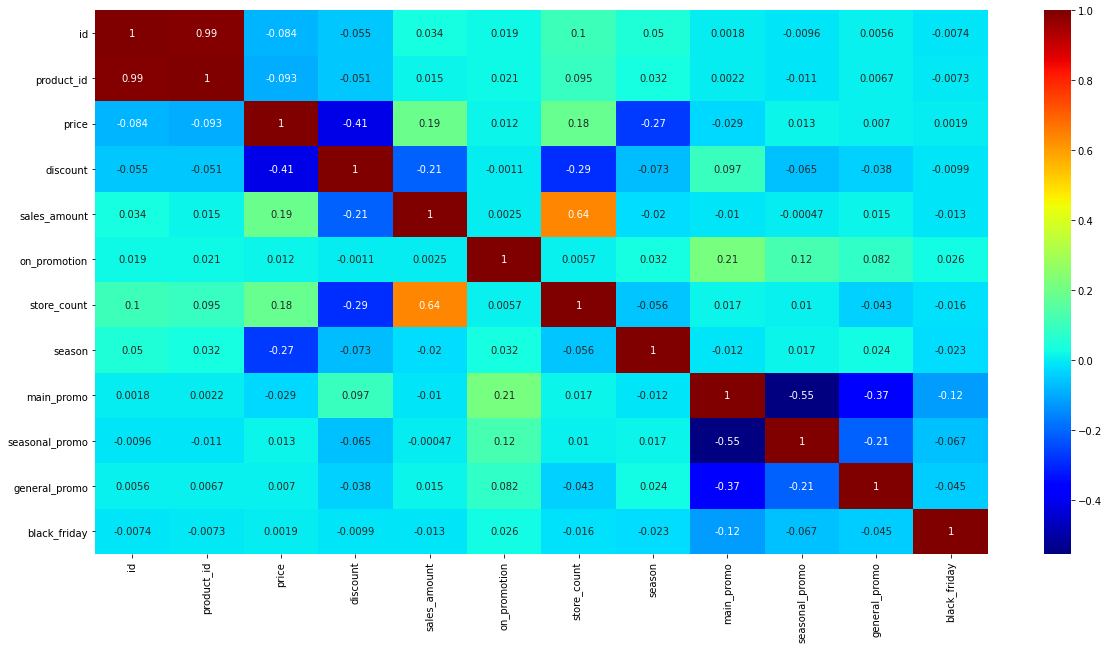

In [55]:
import seaborn as sns
corr=traindata.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap="jet")

# Products

In [56]:
new=pd.read_csv("product.csv")

In [57]:
new2=new.drop(columns="id")
new2=new2.fillna(-1)
new2

,category_1,category_2,category_3,color_type,life_style,fabric,weight_of_fabric,neck_style,form_type,sleeve_type,washing_style,fabric_type
0,Thick Tops,MENSWEAR,Overtees,Green,Daily,versatile,Medium,Bendy,Normal,Long,washless,Polyester
1,Thick Tops,MENSWEAR,Overtees,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,Thick Tops,MENSWEAR,Overtees,Blue,Daily,versatile,Medium,-1,Normal,Long,washless,Polyester
3,Thick Tops,MENSWEAR,Overtees,Black,Daily,versatile,Medium,-1,Normal,Long,washless,Polyester
4,Thick Tops,MENSWEAR,Overtees,Black,Daily Sunday,versatile,Medium,Bendy,Normal,Long,washless,Polyester
...,...,...,...,...,...,...,...,...,...,...,...,...
7871,T-shirts,WOMENSWEAR,Long Sleeves,White,Township,versatile,Medium,High,Fit,Long,washless,Cotton
7872,T-shirts,WOMENSWEAR,Long Sleeves,Black,Visual,Lace,Medium,Bycyle,Very Large,Long,washless,Cotton
7873,T-shirts,WOMENSWEAR,Long Sleeves,Black,Visual,Lace,Medium,Bycyle,Very Large,Long,washless,Cotton
7874,T-shirts,WOMENSWEAR,Long Sleeves,Black,Visual,Lace,Medium,Bycyle,Very Large,Long,washless,Cotton


If the info is missing or Null, they are filled as NaN. Else, they are filled with digits with respective order.

In [58]:
bos=new["id"]
count=0
for i in new2:
    listnew=[]
    listcat=[]
    
    for j in new2[i]:
        if (j==-1 ) or (j=="Null"):
            listcat.append(np.nan)
            count+=1
        else:
            if j not in listnew:
                listnew.append(j)
            listcat.append(listnew.index(j)+1)
    #print(listcat)
    bos=pd.concat([bos,pd.DataFrame(listcat,columns=[i])],axis=1)
#print(count)
bos



,id,category_1,category_2,category_3,color_type,life_style,fabric,weight_of_fabric,neck_style,form_type,sleeve_type,washing_style,fabric_type
0,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1,1,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0
3,4,1,1,1,3.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0
4,5,1,1,1,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7871,7884,2,2,4,9.0,22.0,1.0,1.0,2.0,2.0,1.0,1.0,4.0
7872,7885,2,2,4,3.0,15.0,7.0,1.0,3.0,4.0,1.0,1.0,4.0
7873,7886,2,2,4,3.0,15.0,7.0,1.0,3.0,4.0,1.0,1.0,4.0
7874,7887,2,2,4,3.0,15.0,7.0,1.0,3.0,4.0,1.0,1.0,4.0


# k-NN for filling the missing product info

In [59]:
from sklearn.metrics.pairwise import nan_euclidean_distances
from sklearn.impute import KNNImputer

In [60]:
imputer=KNNImputer(n_neighbors=5)
z=imputer.fit_transform(bos)
q=pd.DataFrame(z,columns=["id","category_1","category_2","category_3","color_type","life_style","fabric","weight_of_fabric","neck_style","form_type","sleeve_type","washing_style","fabric_type"])
newdata=q["id"]
for i in q:
    templist=[]
    for j in q[i]:
        templist.append(int(j))
    newdata=pd.concat([newdata,pd.DataFrame(templist,columns=[i])],axis=1)
newdata
    

,id,id,category_1,category_2,category_3,color_type,life_style,fabric,weight_of_fabric,neck_style,form_type,sleeve_type,washing_style,fabric_type
0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2.0,2,1,1,1,2,1,1,1,1,1,1,1,1
2,3.0,3,1,1,1,2,1,1,1,1,1,1,1,1
3,4.0,4,1,1,1,3,1,1,1,1,1,1,1,1
4,5.0,5,1,1,1,3,2,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7871,7884.0,7884,2,2,4,9,22,1,1,2,2,1,1,4
7872,7885.0,7885,2,2,4,3,15,7,1,3,4,1,1,4
7873,7886.0,7886,2,2,4,3,15,7,1,3,4,1,1,4
7874,7887.0,7887,2,2,4,3,15,7,1,3,4,1,1,4


In [63]:
bos=newdata.iloc[:,1:]

In [64]:
bos

,id,category_1,category_2,category_3,color_type,life_style,fabric,weight_of_fabric,neck_style,form_type,sleeve_type,washing_style,fabric_type
0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,1,1,1,2,1,1,1,1,1,1,1,1
2,3,1,1,1,2,1,1,1,1,1,1,1,1
3,4,1,1,1,3,1,1,1,1,1,1,1,1
4,5,1,1,1,3,2,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7871,7884,2,2,4,9,22,1,1,2,2,1,1,4
7872,7885,2,2,4,3,15,7,1,3,4,1,1,4
7873,7886,2,2,4,3,15,7,1,3,4,1,1,4
7874,7887,2,2,4,3,15,7,1,3,4,1,1,4


<AxesSubplot:>

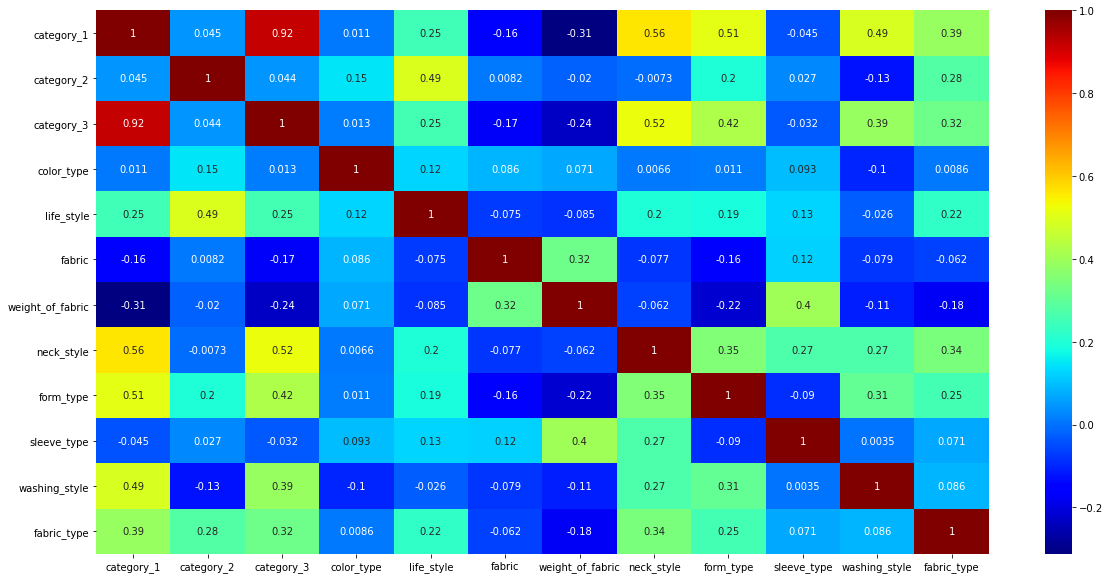

In [65]:
bos2=bos.drop(columns="id")
corr=bos2.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap="jet")

In [66]:
traindata

,id,date,product_id,price,discount,sales_amount,on_promotion,store_count,season,main_promo,seasonal_promo,general_promo,black_friday
0,1,2018-08-06,21,221.47,0.0,83.0,1,85,-1,3,0,0,0
1,2,2018-08-13,21,221.47,0.0,100.0,1,85,-1,3,0,0,0
2,3,2018-08-20,21,221.47,0.0,127.0,1,85,-1,3,0,0,0
3,4,2018-08-27,21,221.47,0.0,89.0,1,84,-1,3,0,0,0
4,5,2018-09-03,21,221.47,0.0,124.0,1,85,-1,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405287,405288,2020-10-26,7888,61.57,0.0,0.0,1,17,1,0,1,0,0
405288,405289,2020-11-02,7888,61.57,0.0,0.0,1,15,1,0,1,0,0
405289,405290,2020-11-09,7888,61.57,0.0,0.0,1,13,1,0,1,0,0
405290,405291,2020-11-16,7888,61.57,0.0,0.0,1,10,1,0,1,0,0


In [67]:
yet=pd.concat([traindata,bos2],axis=1)
yet.iloc[:,13]

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
405287    NaN
405288    NaN
405289    NaN
405290    NaN
405291    NaN
Name: category_1, Length: 405292, dtype: float64

In [68]:
bos

,id,category_1,category_2,category_3,color_type,life_style,fabric,weight_of_fabric,neck_style,form_type,sleeve_type,washing_style,fabric_type
0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,1,1,1,2,1,1,1,1,1,1,1,1
2,3,1,1,1,2,1,1,1,1,1,1,1,1
3,4,1,1,1,3,1,1,1,1,1,1,1,1
4,5,1,1,1,3,2,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7871,7884,2,2,4,9,22,1,1,2,2,1,1,4
7872,7885,2,2,4,3,15,7,1,3,4,1,1,4
7873,7886,2,2,4,3,15,7,1,3,4,1,1,4
7874,7887,2,2,4,3,15,7,1,3,4,1,1,4


In [26]:
bosnp=bos.to_numpy()
bosnp[20]

array([21,  1,  1,  1,  2,  3,  1,  1,  0,  3,  1,  2,  6], dtype=int64)

In [69]:
denemelist=[]
for i in traindata["product_id"]:
    if i<48:
        denemelist.append(bosnp[i-1])
    elif i>47 and i<333:
        denemelist.append(bosnp[i-2])
    elif i>332 and i<2165:
        denemelist.append(bosnp[i-3])
    elif i>2164 and i<2343:
        denemelist.append(bosnp[i-4])
    elif i>2342 and i<2938:
        denemelist.append(bosnp[i-5])
    elif i>2937 and i<3571:
        denemelist.append(bosnp[i-6])
    elif i>3570 and i<3590:
        denemelist.append(bosnp[i-7])
    elif i>3589 and i<3733:
        denemelist.append(bosnp[i-8])
    elif i>3732 and i<3793:
        denemelist.append(bosnp[i-9])
    elif i>3792 and i<4586:
        denemelist.append(bosnp[i-10])
    elif i>4585 and i<5392:
        denemelist.append(bosnp[i-11])
    elif i>5391 and i<6491:
        denemelist.append(bosnp[i-12])
    else:
        denemelist.append(bosnp[i-13])
len(denemelist)

405292

In [70]:
temp=0
for i in bos["id"]:
    if i-temp==1:
        temp=i
    else:
        print(i)
        temp=i
        

48
333
2165
2343
2938
3571
3590
3733
3793
4586
5392
6491


In [71]:
denpd=pd.DataFrame(denemelist,columns=["id","category_1","category_2","category_3","color_type","life_style","fabric","weight_of_fabric","neck_style","form_type","sleeve_type","washing_style","fabric_type"])

In [72]:
denpd2=denpd.drop(columns="id")

In [73]:
denpd2

,category_1,category_2,category_3,color_type,life_style,fabric,weight_of_fabric,neck_style,form_type,sleeve_type,washing_style,fabric_type
0,1,1,1,2,3,1,1,0,3,1,2,6
1,1,1,1,2,3,1,1,0,3,1,2,6
2,1,1,1,2,3,1,1,0,3,1,2,6
3,1,1,1,2,3,1,1,0,3,1,2,6
4,1,1,1,2,3,1,1,0,3,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
405287,2,2,3,3,18,3,3,3,3,3,1,8
405288,2,2,3,3,18,3,3,3,3,3,1,8
405289,2,2,3,3,18,3,3,3,3,3,1,8
405290,2,2,3,3,18,3,3,3,3,3,1,8


In [74]:
traindata

,id,date,product_id,price,discount,sales_amount,on_promotion,store_count,season,main_promo,seasonal_promo,general_promo,black_friday
0,1,2018-08-06,21,221.47,0.0,83.0,1,85,-1,3,0,0,0
1,2,2018-08-13,21,221.47,0.0,100.0,1,85,-1,3,0,0,0
2,3,2018-08-20,21,221.47,0.0,127.0,1,85,-1,3,0,0,0
3,4,2018-08-27,21,221.47,0.0,89.0,1,84,-1,3,0,0,0
4,5,2018-09-03,21,221.47,0.0,124.0,1,85,-1,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405287,405288,2020-10-26,7888,61.57,0.0,0.0,1,17,1,0,1,0,0
405288,405289,2020-11-02,7888,61.57,0.0,0.0,1,15,1,0,1,0,0
405289,405290,2020-11-09,7888,61.57,0.0,0.0,1,13,1,0,1,0,0
405290,405291,2020-11-16,7888,61.57,0.0,0.0,1,10,1,0,1,0,0


In [75]:
all_train=pd.concat([traindata,denpd2],axis=1)
all_train

,id,date,product_id,price,discount,sales_amount,on_promotion,store_count,season,main_promo,...,category_3,color_type,life_style,fabric,weight_of_fabric,neck_style,form_type,sleeve_type,washing_style,fabric_type
0,1,2018-08-06,21,221.47,0.0,83.0,1,85,-1,3,...,1,2,3,1,1,0,3,1,2,6
1,2,2018-08-13,21,221.47,0.0,100.0,1,85,-1,3,...,1,2,3,1,1,0,3,1,2,6
2,3,2018-08-20,21,221.47,0.0,127.0,1,85,-1,3,...,1,2,3,1,1,0,3,1,2,6
3,4,2018-08-27,21,221.47,0.0,89.0,1,84,-1,3,...,1,2,3,1,1,0,3,1,2,6
4,5,2018-09-03,21,221.47,0.0,124.0,1,85,-1,3,...,1,2,3,1,1,0,3,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405287,405288,2020-10-26,7888,61.57,0.0,0.0,1,17,1,0,...,3,3,18,3,3,3,3,3,1,8
405288,405289,2020-11-02,7888,61.57,0.0,0.0,1,15,1,0,...,3,3,18,3,3,3,3,3,1,8
405289,405290,2020-11-09,7888,61.57,0.0,0.0,1,13,1,0,...,3,3,18,3,3,3,3,3,1,8
405290,405291,2020-11-16,7888,61.57,0.0,0.0,1,10,1,0,...,3,3,18,3,3,3,3,3,1,8


In [76]:
import datetime as dt
all_train["date"]=pd.to_datetime(all_train["date"])
all_train['year']=all_train['date'].dt.year
year=all_train['year']
all_train['month']=all_train['date'].dt.month
month=all_train['month']
all_train['day']=all_train['date'].dt.day
day=all_train['day']
all_train["weekofyear"]=all_train["date"].dt.weekofyear
weekofyear=all_train["weekofyear"]

<ipython-input-76-05a8babffa66>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  all_train["weekofyear"]=all_train["date"].dt.weekofyear


In [77]:
trainlast=all_train.drop(columns=["date","id"])
trainlast

,product_id,price,discount,sales_amount,on_promotion,store_count,season,main_promo,seasonal_promo,general_promo,...,weight_of_fabric,neck_style,form_type,sleeve_type,washing_style,fabric_type,year,month,day,weekofyear
0,21,221.47,0.0,83.0,1,85,-1,3,0,0,...,1,0,3,1,2,6,2018,8,6,32
1,21,221.47,0.0,100.0,1,85,-1,3,0,0,...,1,0,3,1,2,6,2018,8,13,33
2,21,221.47,0.0,127.0,1,85,-1,3,0,0,...,1,0,3,1,2,6,2018,8,20,34
3,21,221.47,0.0,89.0,1,84,-1,3,0,0,...,1,0,3,1,2,6,2018,8,27,35
4,21,221.47,0.0,124.0,1,85,-1,3,0,0,...,1,0,3,1,2,6,2018,9,3,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405287,7888,61.57,0.0,0.0,1,17,1,0,1,0,...,3,3,3,3,1,8,2020,10,26,44
405288,7888,61.57,0.0,0.0,1,15,1,0,1,0,...,3,3,3,3,1,8,2020,11,2,45
405289,7888,61.57,0.0,0.0,1,13,1,0,1,0,...,3,3,3,3,1,8,2020,11,9,46
405290,7888,61.57,0.0,0.0,1,10,1,0,1,0,...,3,3,3,3,1,8,2020,11,16,47


# Holidays

In [78]:
holidays=pd.read_csv("holidays.csv")

In [79]:
holidays["date"]=pd.to_datetime(holidays["date"])
holidays['year']=holidays['date'].dt.year
year=holidays['year']
holidays['month']=holidays['date'].dt.month
month=holidays['month']
holidays['day']=holidays['date'].dt.day
day=holidays['day']
holidays["weekofyear"]=holidays["date"].dt.weekofyear
weekofyear=holidays["weekofyear"]

<ipython-input-79-b9113463a89c>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  holidays["weekofyear"]=holidays["date"].dt.weekofyear


In [80]:
holidays

,date,holiday,year,month,day,weekofyear
0,2020-04-23,CocukBayrami,2020,4,23,17
1,2021-04-23,CocukBayrami,2021,4,23,16
2,2022-04-23,CocukBayrami,2022,4,23,16
3,2017-10-29,CumhuriyetBayrami,2017,10,29,43
4,2018-10-29,CumhuriyetBayrami,2018,10,29,44
...,...,...,...,...,...,...
460,2025-03-08,womens_day,2025,3,8,10
461,2026-03-08,womens_day,2026,3,8,10
462,2027-03-08,womens_day,2027,3,8,10
463,2028-03-08,womens_day,2028,3,8,10


In [81]:
allyears=[]
allweeks=[]
for i in trainlast["year"]:
    allyears.append(i)
for j in trainlast["weekofyear"]:
    allweeks.append(j)
hyears=[]
hweeks=[]
for i in holidays["year"]:
    hyears.append(i)
for j in holidays["weekofyear"]:
    hweeks.append(j)

In [82]:
hlist=[]
hslist=[]
hcount=0
count=0
for i in holidays["holiday"]:
    count+=1
    if i not in hlist:
        hlist.append(i)
        hslist.append(count-1)
        hcount+=1
print(hslist)
#hlist

[0, 3, 8, 14, 20, 26, 61, 81, 82, 117, 152, 187, 222, 257, 292, 297, 299, 302, 307, 308, 313, 322, 327, 337, 342, 347, 362, 377, 392, 407, 437, 450]


In [83]:
bc=0
for i in range(hcount-1):
    templist=[]
    for y in range(len(allyears)):
        tc=0
        for j in range(hslist[i],hslist[i+1]):
            if (hyears[j]==allyears[y] and hweeks[j]==allweeks[y]) or (hyears[j]==allyears[y] and hweeks[j]==allweeks[y]-1):
                tc=1
                if tc>0:
                    break
        templist.append(tc)
    bc+=1
    trainlast[hlist[i]]=pd.DataFrame(templist)
            

In [84]:
trainlast

,product_id,price,discount,sales_amount,on_promotion,store_count,season,main_promo,seasonal_promo,general_promo,...,StatehoodDay,VisuallyImpairedPeopleDay,WhitMonday,WhitSunday,YouthDay,fathers_day,mothers_day,new_years,new_years_eve,valentines_day
0,21,221.47,0.0,83.0,1,85,-1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,221.47,0.0,100.0,1,85,-1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,221.47,0.0,127.0,1,85,-1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21,221.47,0.0,89.0,1,84,-1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,221.47,0.0,124.0,1,85,-1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405287,7888,61.57,0.0,0.0,1,17,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
405288,7888,61.57,0.0,0.0,1,15,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
405289,7888,61.57,0.0,0.0,1,13,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
405290,7888,61.57,0.0,0.0,1,10,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
trainlast.to_csv('knntrainout.csv')